## Purpose of Project:

Using the dataset with stock trade information, I will attempt to apply machine learning to determine what feature(s) predict whether a contract was a win or loss. This could potentially allow me to aid financial/stock advisors in determining patterns in the stock market to know when to make a certain action for the maximum monetary gain from options trading.

Dataset: [MUHAMMAD ANAS-Tradyflow - Options Trading!](https://www.kaggle.com/datasets/muhammadanas0716/tradyflow-options-trading)

In [1]:
#imports 

import numpy as np
import pandas as pd

In [2]:
title = "Trady Flow - Best Options Trade Ideas.csv"
df = pd.read_csv(title)
df

,Time,Sym,C/P,Exp,Strike,Spot,BidAsk,Orders,Vol,Prems,OI,Diff(%),ITM
0,6/17/2022 15:07,ISEE,Call,10/21/2022,10.0,9.54,5.05,7,360,183.60K,4.07K,4.71,0
1,6/17/2022 15:05,CVNA,Call,1/19/2024,60.0,23.52,4.60,7,634,310.66K,130,155.05,0
2,6/17/2022 14:51,PTLO,Put,2/17/2023,15.0,15.19,3.50,7,800,281.00K,0,1.39,0
3,6/17/2022 14:39,TWLO,Call,6/24/2022,86.0,84.51,2.95,5,722,198.80K,436,2.48,0
4,6/17/2022 13:56,ATUS,Put,9/16/2022,7.0,8.62,0.68,5,6.27K,501.84K,8.63K,23.13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7822,6/7/2021 11:41,INTC,Call,1/21/2022,57.5,56.78,4.62,7,626,291.09K,8.92K,1.23,1
7823,6/7/2021 11:15,RKT,Call,7/16/2021,21.0,19.72,1.38,6,1.24K,188.88K,10.41K,5.34,1
7824,6/7/2021 10:51,IRBT,Put,8/20/2021,100.0,100.62,10.35,5,692,747.48K,4.45K,0.62,1
7825,6/7/2021 10:33,CMCSA,Put,1/20/2023,52.5,57.19,5.27,6,857,467.06K,3.49K,8.92,1


## Data Exploration

In [3]:
#find null values

df.isnull().any()

Time       False
Sym        False
C/P        False
Exp        False
Strike     False
Spot       False
BidAsk     False
Orders     False
Vol        False
Prems      False
OI         False
Diff(%)    False
ITM        False
dtype: bool

split is 3:5 -> downsample 

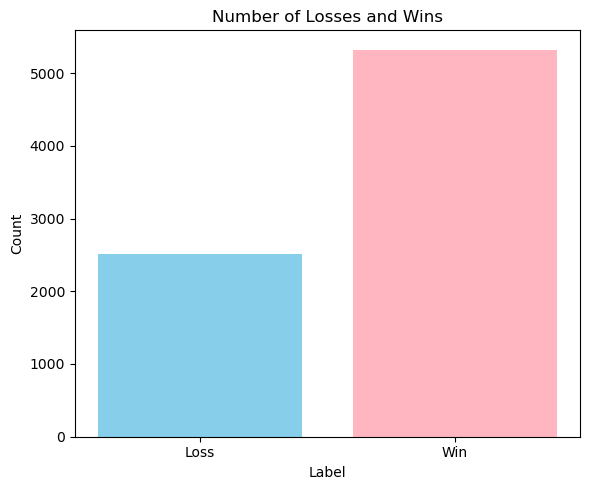

In [4]:
# bar graph of ITM split 

#distribution of loss/win
import matplotlib.pyplot as plt

# Assuming the first column contains the labels 
labels = df.iloc[:, -1]

# Count the number of loss/win
Loss = (labels == 0).sum()
Win = (labels == 1).sum()

# Create a list for categories
categories = ["Loss", "Win"]

# Create a list for counts
counts = [Loss, Win]

# Create the bar chart
plt.figure(figsize=(6, 5)) 
plt.bar(categories, counts, color=['skyblue', 'lightpink'])  
plt.xlabel("Label")
plt.ylabel("Count")
plt.title("Number of Losses and Wins")
plt.xticks(rotation=0)  
plt.tight_layout()


plt.show()

In [5]:
#get numerical count for each binary classification

print(df['ITM'].value_counts(dropna=False))

1    5321
0    2506
Name: ITM, dtype: int64


In [6]:
#change C/P to binary (one hot encoding)

#2 - Make dictionary

CP_labels_to_numbers = {
    "Call" : 0,
    "Put" : 1
}

# Directly replace labels with numbers using dictionary lookup
df["C/P"] = df["C/P"].replace(CP_labels_to_numbers)

#make updated csv
df.to_csv("Trady Flow_MT_encode.csv", index = False)

#open new csv

df = pd.read_csv("Trady Flow_MT_encode.csv")

df



,Time,Sym,C/P,Exp,Strike,Spot,BidAsk,Orders,Vol,Prems,OI,Diff(%),ITM
0,6/17/2022 15:07,ISEE,0,10/21/2022,10.0,9.54,5.05,7,360,183.60K,4.07K,4.71,0
1,6/17/2022 15:05,CVNA,0,1/19/2024,60.0,23.52,4.60,7,634,310.66K,130,155.05,0
2,6/17/2022 14:51,PTLO,1,2/17/2023,15.0,15.19,3.50,7,800,281.00K,0,1.39,0
3,6/17/2022 14:39,TWLO,0,6/24/2022,86.0,84.51,2.95,5,722,198.80K,436,2.48,0
4,6/17/2022 13:56,ATUS,1,9/16/2022,7.0,8.62,0.68,5,6.27K,501.84K,8.63K,23.13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7822,6/7/2021 11:41,INTC,0,1/21/2022,57.5,56.78,4.62,7,626,291.09K,8.92K,1.23,1
7823,6/7/2021 11:15,RKT,0,7/16/2021,21.0,19.72,1.38,6,1.24K,188.88K,10.41K,5.34,1
7824,6/7/2021 10:51,IRBT,1,8/20/2021,100.0,100.62,10.35,5,692,747.48K,4.45K,0.62,1
7825,6/7/2021 10:33,CMCSA,1,1/20/2023,52.5,57.19,5.27,6,857,467.06K,3.49K,8.92,1


------------------

In [7]:
df["Prems"]

0       183.60K
1       310.66K
2       281.00K
3       198.80K
4       501.84K
         ...   
7822    291.09K
7823    188.88K
7824    747.48K
7825    467.06K
7826    219.40K
Name: Prems, Length: 7827, dtype: object

Here, I want to convert values with K to their propernumerical format. I should multiply the values by 1000 in columns Vol and OI

In [8]:
# Prems, OI, and Vol

def process_value(value):
    if not value:  # Check for empty string
        return 0  # Fill empty strings with zero
    unit = value[-1].upper()  # Extract the last character (unit)
    value = float(value[:-1])  # Remove the unit and convert to float

    if unit == 'K':
        value *= 1000  # Multiply by 1000 for thousands
    elif unit == 'M':
        value *= 1e6  # Multiply by 10^6 for millions
    else:
        value == 0

    return int(value)  # Convert to int64



df

,Time,Sym,C/P,Exp,Strike,Spot,BidAsk,Orders,Vol,Prems,OI,Diff(%),ITM
0,6/17/2022 15:07,ISEE,0,10/21/2022,10.0,9.54,5.05,7,360,183.60K,4.07K,4.71,0
1,6/17/2022 15:05,CVNA,0,1/19/2024,60.0,23.52,4.60,7,634,310.66K,130,155.05,0
2,6/17/2022 14:51,PTLO,1,2/17/2023,15.0,15.19,3.50,7,800,281.00K,0,1.39,0
3,6/17/2022 14:39,TWLO,0,6/24/2022,86.0,84.51,2.95,5,722,198.80K,436,2.48,0
4,6/17/2022 13:56,ATUS,1,9/16/2022,7.0,8.62,0.68,5,6.27K,501.84K,8.63K,23.13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7822,6/7/2021 11:41,INTC,0,1/21/2022,57.5,56.78,4.62,7,626,291.09K,8.92K,1.23,1
7823,6/7/2021 11:15,RKT,0,7/16/2021,21.0,19.72,1.38,6,1.24K,188.88K,10.41K,5.34,1
7824,6/7/2021 10:51,IRBT,1,8/20/2021,100.0,100.62,10.35,5,692,747.48K,4.45K,0.62,1
7825,6/7/2021 10:33,CMCSA,1,1/20/2023,52.5,57.19,5.27,6,857,467.06K,3.49K,8.92,1


In [9]:
# Apply processing function to 'Prems' column
df['Prems'] = df['Prems'].apply(process_value)
df['Vol'] = df['Vol'].apply(process_value).astype(int)
df

,Time,Sym,C/P,Exp,Strike,Spot,BidAsk,Orders,Vol,Prems,OI,Diff(%),ITM
0,6/17/2022 15:07,ISEE,0,10/21/2022,10.0,9.54,5.05,7,36,183600,4.07K,4.71,0
1,6/17/2022 15:05,CVNA,0,1/19/2024,60.0,23.52,4.60,7,63,310660,130,155.05,0
2,6/17/2022 14:51,PTLO,1,2/17/2023,15.0,15.19,3.50,7,80,281000,0,1.39,0
3,6/17/2022 14:39,TWLO,0,6/24/2022,86.0,84.51,2.95,5,72,198800,436,2.48,0
4,6/17/2022 13:56,ATUS,1,9/16/2022,7.0,8.62,0.68,5,6270,501840,8.63K,23.13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7822,6/7/2021 11:41,INTC,0,1/21/2022,57.5,56.78,4.62,7,62,291090,8.92K,1.23,1
7823,6/7/2021 11:15,RKT,0,7/16/2021,21.0,19.72,1.38,6,1240,188880,10.41K,5.34,1
7824,6/7/2021 10:51,IRBT,1,8/20/2021,100.0,100.62,10.35,5,69,747480,4.45K,0.62,1
7825,6/7/2021 10:33,CMCSA,1,1/20/2023,52.5,57.19,5.27,6,85,467060,3.49K,8.92,1


In [10]:
import pandas as pd

def process_value(value):
  if not value:  # Check for empty string
    return value  # Return the value itself for empty strings
  if not value[-1].isalpha():  # Check if last character is a letter
    return value  # Return the value itself for non-letter ending values
  unit = value[-1].upper()  # Extract the last character (unit)
  value = float(value[:-1])  # Remove the unit and convert to float

  if unit == 'K':
    value *= 1000  # Multiply by 1000 for thousands
  elif unit == 'M':
    value *= 1e6  # Multiply by 10^6 for millions
  else:
    raise ValueError(f"Invalid unit: {unit}")

  # Explicitly cast to int64 before returning
  return int(value)  # Convert to int64

# Apply processing function directly to 'OI' column
df['OI'] = df['OI'].apply(process_value).astype(float)

df

,Time,Sym,C/P,Exp,Strike,Spot,BidAsk,Orders,Vol,Prems,OI,Diff(%),ITM
0,6/17/2022 15:07,ISEE,0,10/21/2022,10.0,9.54,5.05,7,36,183600,4070.0,4.71,0
1,6/17/2022 15:05,CVNA,0,1/19/2024,60.0,23.52,4.60,7,63,310660,130.0,155.05,0
2,6/17/2022 14:51,PTLO,1,2/17/2023,15.0,15.19,3.50,7,80,281000,0.0,1.39,0
3,6/17/2022 14:39,TWLO,0,6/24/2022,86.0,84.51,2.95,5,72,198800,436.0,2.48,0
4,6/17/2022 13:56,ATUS,1,9/16/2022,7.0,8.62,0.68,5,6270,501840,8630.0,23.13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7822,6/7/2021 11:41,INTC,0,1/21/2022,57.5,56.78,4.62,7,62,291090,8920.0,1.23,1
7823,6/7/2021 11:15,RKT,0,7/16/2021,21.0,19.72,1.38,6,1240,188880,10410.0,5.34,1
7824,6/7/2021 10:51,IRBT,1,8/20/2021,100.0,100.62,10.35,5,69,747480,4450.0,0.62,1
7825,6/7/2021 10:33,CMCSA,1,1/20/2023,52.5,57.19,5.27,6,85,467060,3490.0,8.92,1


In [11]:
df.dtypes

Time        object
Sym         object
C/P          int64
Exp         object
Strike     float64
Spot       float64
BidAsk     float64
Orders       int64
Vol          int32
Prems        int64
OI         float64
Diff(%)    float64
ITM          int64
dtype: object

I also want to try to change features "time","symb",and "exp" into integer/float format (Done)

In [12]:
# using get_dummies on Sym column
from sklearn.preprocessing import LabelEncoder

columns = ['Time','Exp','Sym']
#making instance of labelencoder()

for name in columns:
    le = LabelEncoder()
    encoded = le.fit_transform(df[name])
    df[name] = encoded

In [13]:
df.head()

,Time,Sym,C/P,Exp,Strike,Spot,BidAsk,Orders,Vol,Prems,OI,Diff(%),ITM
0,3878,518,0,9,10.0,9.54,5.05,7,36,183600,4070.0,4.71,0
1,3877,272,0,2,60.0,23.52,4.60,7,63,310660,130.0,155.05,0
2,3876,788,1,28,15.0,15.19,3.50,7,80,281000,0.0,1.39,0
3,3875,982,0,57,86.0,84.51,2.95,5,72,198800,436.0,2.48,0
4,3874,91,1,76,7.0,8.62,0.68,5,6270,501840,8630.0,23.13,0


In [14]:
#save new df
# df.to_csv('updated_Tradeflow.csv', index=False)  
print("Saved updated_Tradeflow.csv")

Saved updated_Tradeflow.csv


Standardize continuous variables</br>

[Code](https://stackoverflow.com/questions/49282889/using-sklearn-standardscaler-on-only-select-columns)

Reason for standardization: </br>

* puts all values under columns that have continuous values on the same scale so they are comparable

In [15]:
from sklearn.preprocessing import StandardScaler

# Define columns to scale using iloc
columns_to_scale = df.iloc[:, 3:12].columns  # Get column names

# Create the StandardScaler object
scaler = StandardScaler()

# Select the df for scaling
df_to_scale = df[columns_to_scale]

# Fit the scaler on the df (learn mean and standard deviation)
scaler.fit(df_to_scale)

# Transform the df (scale the values)
scaled_df = scaler.transform(df_to_scale)

# Create a new dfFrame with the scaled columns
scaled_df = pd.DataFrame(scaled_df, columns=columns_to_scale)

# Combine the scaled columns with the original dfFrame (excluding scaled columns)
df = pd.concat([df[col] for col in df.columns if col not in columns_to_scale], axis=1, join='inner')
df = pd.concat([df, scaled_df], axis=1)



In [16]:
# Print the new dfFrame with scaled columns
df

,Time,Sym,C/P,ITM,Exp,Strike,Spot,BidAsk,Orders,Vol,Prems,OI,Diff(%)
0,3878,518,0,0,-0.902891,-0.393643,-0.393319,0.159260,-0.020614,-0.494770,-0.360597,-0.255420,-0.349449
1,3877,272,0,0,-1.158445,-0.254230,-0.353776,0.072847,-0.020614,-0.489401,-0.275015,-0.490891,7.413426
2,3876,788,1,0,-0.209246,-0.379702,-0.377338,-0.138386,-0.020614,-0.486021,-0.294993,-0.498661,-0.520879
3,3875,982,0,0,0.849475,-0.181735,-0.181266,-0.244003,-0.397144,-0.487612,-0.350359,-0.472603,-0.464597
4,3874,91,1,0,1.543121,-0.402008,-0.395921,-0.679910,-0.397144,0.744755,-0.146246,0.017105,0.601676
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7822,4289,505,0,1,-1.085429,-0.261201,-0.259700,0.076687,-0.020614,-0.489600,-0.288197,0.034436,-0.529141
7823,4288,828,0,1,1.105029,-0.362972,-0.364524,-0.545489,-0.208879,-0.255375,-0.357040,0.123485,-0.316919
7824,4287,515,1,1,1.360582,-0.142699,-0.135699,1.177018,-0.397144,-0.488208,0.019205,-0.232710,-0.560639
7825,4286,223,1,1,-1.121937,-0.275142,-0.258541,0.201507,-0.208879,-0.485027,-0.169672,-0.290083,-0.132064


In [17]:
first_column = df.pop('ITM')
df.insert(12, 'ITM', first_column)

In [18]:
df

,Time,Sym,C/P,Exp,Strike,Spot,BidAsk,Orders,Vol,Prems,OI,Diff(%),ITM
0,3878,518,0,-0.902891,-0.393643,-0.393319,0.159260,-0.020614,-0.494770,-0.360597,-0.255420,-0.349449,0
1,3877,272,0,-1.158445,-0.254230,-0.353776,0.072847,-0.020614,-0.489401,-0.275015,-0.490891,7.413426,0
2,3876,788,1,-0.209246,-0.379702,-0.377338,-0.138386,-0.020614,-0.486021,-0.294993,-0.498661,-0.520879,0
3,3875,982,0,0.849475,-0.181735,-0.181266,-0.244003,-0.397144,-0.487612,-0.350359,-0.472603,-0.464597,0
4,3874,91,1,1.543121,-0.402008,-0.395921,-0.679910,-0.397144,0.744755,-0.146246,0.017105,0.601676,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7822,4289,505,0,-1.085429,-0.261201,-0.259700,0.076687,-0.020614,-0.489600,-0.288197,0.034436,-0.529141,1
7823,4288,828,0,1.105029,-0.362972,-0.364524,-0.545489,-0.208879,-0.255375,-0.357040,0.123485,-0.316919,1
7824,4287,515,1,1.360582,-0.142699,-0.135699,1.177018,-0.397144,-0.488208,0.019205,-0.232710,-0.560639,1
7825,4286,223,1,-1.121937,-0.275142,-0.258541,0.201507,-0.208879,-0.485027,-0.169672,-0.290083,-0.132064,1


Get 50:50 Split

In [19]:
import pandas as pd

def get_random_class_rows(df, class_value, num_rows, random_state=None):

  # Filter rows belonging to the desired class
  class_df = df[df.ITM == class_value]  # Replace 'target' with your class column name

  # Sample random rows (use random_state for reproducibility)
  if random_state is not None:
    sampled_df = class_df.sample(n=num_rows, random_state=random_state)
  else:
    sampled_df = class_df.sample(n=num_rows)

  return sampled_df

# Assuming your DataFrame is named 'df' and the class column is 'target'
class_0_df = get_random_class_rows(df.copy(), 0, 2500)  # Get 2000 rows of class 0
class_1_df = get_random_class_rows(df.copy(), 1, 2500)  # Get 2000 rows of class 1

# (Optional) Combine the DataFrames if needed
df = pd.concat([class_0_df, class_1_df], ignore_index=True)


In [20]:
df

,Time,Sym,C/P,Exp,Strike,Spot,BidAsk,Orders,Vol,Prems,OI,Diff(%),ITM
0,2054,94,0,-0.172738,-0.351819,-0.359971,-0.205597,-0.397144,0.225801,0.377884,-0.495194,0.156062,0
1,7176,688,1,-1.085429,0.526486,0.596148,1.340244,-0.208879,-0.488805,0.013331,-0.493700,-0.289552,0
2,5438,783,0,-1.121937,-0.337878,-0.377734,-0.455235,-0.397144,-0.484828,-0.369171,-0.149040,4.549723,0
3,2253,861,0,-1.121937,-0.414555,-0.415183,-0.628062,-0.397144,0.110478,-0.276740,-0.209999,1.388084,0
4,4361,836,0,1.105029,-0.379702,-0.388425,-0.532047,0.544181,0.734814,-0.113094,-0.452881,1.508911,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4666,649,1,1.360582,-0.337878,-0.322663,-0.589656,-0.397144,0.015038,-0.277157,-0.403635,0.197886,1
4996,4108,577,0,-0.172738,-0.003286,-0.035259,2.261987,-0.020614,-0.490793,0.196025,-0.498661,-0.084043,1
4997,503,49,0,-0.939399,-0.112028,-0.107951,-0.624222,-0.208879,-0.058530,-0.325538,0.015312,-0.577162,1
4998,2872,520,0,0.739953,0.414955,0.341158,1.465063,-0.397144,-0.493577,-0.112393,-0.253627,-0.063905,1


## Logistic Regression

Code referenced: [Susan Li -Building A Logistic Regression in Python, Step by Step](https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8)

a) Logistic Regression

In [21]:
#validate we got last column
df.iloc[:,-1:]

,ITM
0,0
1,0
2,0
3,0
4,0
...,...
4995,1
4996,1
4997,1
4998,1


In [22]:
X = df.iloc[:,:-1]
y = df["ITM"]

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\journ\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.70


In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.56      0.64       481
           1       0.67      0.84      0.75       519

    accuracy                           0.70      1000
   macro avg       0.72      0.70      0.70      1000
weighted avg       0.72      0.70      0.70      1000



d) Analyze coefficients and scores </br>

The dotted line is the ROC curve of a perfect classifier where the ratio between TPR and FPR is 1. We want a higher TPR relative to FPR. In other words, it's better when the blue curve is far away from the red line as possible.

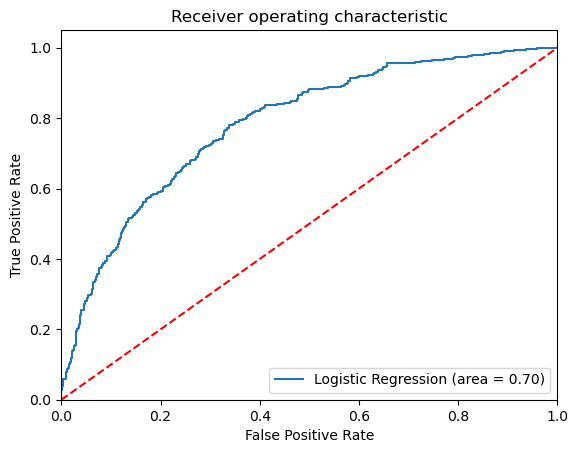

In [26]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Coefficients:</br>

Allows me to see the magnitude and direction of an effect a feature has on whether a trade was a win or loss.

In [29]:
logreg.coef_

array([[-4.21854846e-06, -1.52723998e-04,  2.65528962e-01,
         1.25888528e-01, -4.56636737e-02, -2.51290626e-03,
        -4.75006501e-02,  3.08729098e-02, -4.83354153e-02,
        -1.77859247e-02,  7.22221512e-04, -1.93560404e+00]])

In [27]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, logreg.coef_[0][idx]))

The coefficient for Time is -4.2185484640257904e-06
The coefficient for Sym is -0.00015272399789444073
The coefficient for C/P is 0.2655289620896227
The coefficient for Exp is 0.12588852801760145
The coefficient for Strike is -0.045663673733153304
The coefficient for Spot is -0.0025129062576181383
The coefficient for BidAsk is -0.04750065005626259
The coefficient for Orders is 0.030872909781244177
The coefficient for Vol is -0.04833541530262957
The coefficient for Prems is -0.017785924726748812
The coefficient for OI is 0.0007222215120531627
The coefficient for Diff(%) is -1.9356040386569222
